# UNIST MGE303 Data Mining
## Lab Session 01 | 2021-04-19 (MON)
### Kyeongbin Kim (kimkyle@unist.ac.kr)



## Supervised Learning (Regression): House Price Prediction

**This Jupyter Kernel is based on Seok-Ju Hahn's work** 

### Preparation
- Load packages using `import` command and alias command (`as`)
- Remember trio: numpy, pandas, matplotlib

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Munging
* <a href='#Load-data'>Load data</a>
* <a href='#Handle-data'>Handle data</a>
* <a href='#Split-training-and-test-data'>Split training and test data</a>

#### Load data
* Load data using `read_csv()` method
  - Pandas package read data as `DataFrame` attribute

In [120]:
df = pd.read_csv('./housing.csv')

* Check the first few rows of data using `head()` method

In [121]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Handle data
* Get some parts of data using `iloc[row_index, column_index]` and `loc[row_index_name, column_name]` methods
  - `:` means 'all'
  - Attaching `.values` returns numpy array, if not it reutrns `pd.Series` attribute

In [65]:
"""
- Get the first column of data
"""
df.iloc[:, 0]

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64

In [66]:
"""
- Get the first column of data attaching `.values`
= CAUTION: in Python, index strats at 0
"""
df.iloc[:, 0].values

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

In [67]:
"""
- Get the 11th data of 'total_rooms' feature 
"""
df.loc[10, 'total_rooms']

2202.0

* You can refer a specific column using `[]` notation or `.column_name` notation

In [68]:
"""
- Get the 'latitude' column
"""
df.latitude

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

* Check simple description of data using `info()` method
  - Column name
  - Column/Row counts
  - Data types
  - Counts of non-null samples

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Check a categorical feature using `value_counts()` method

In [70]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* Check summarized information of numerical features using `describe()` method

In [71]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Plot histogram of each column to check sanity of the data
  - Attach `hist()` method to your dataframe

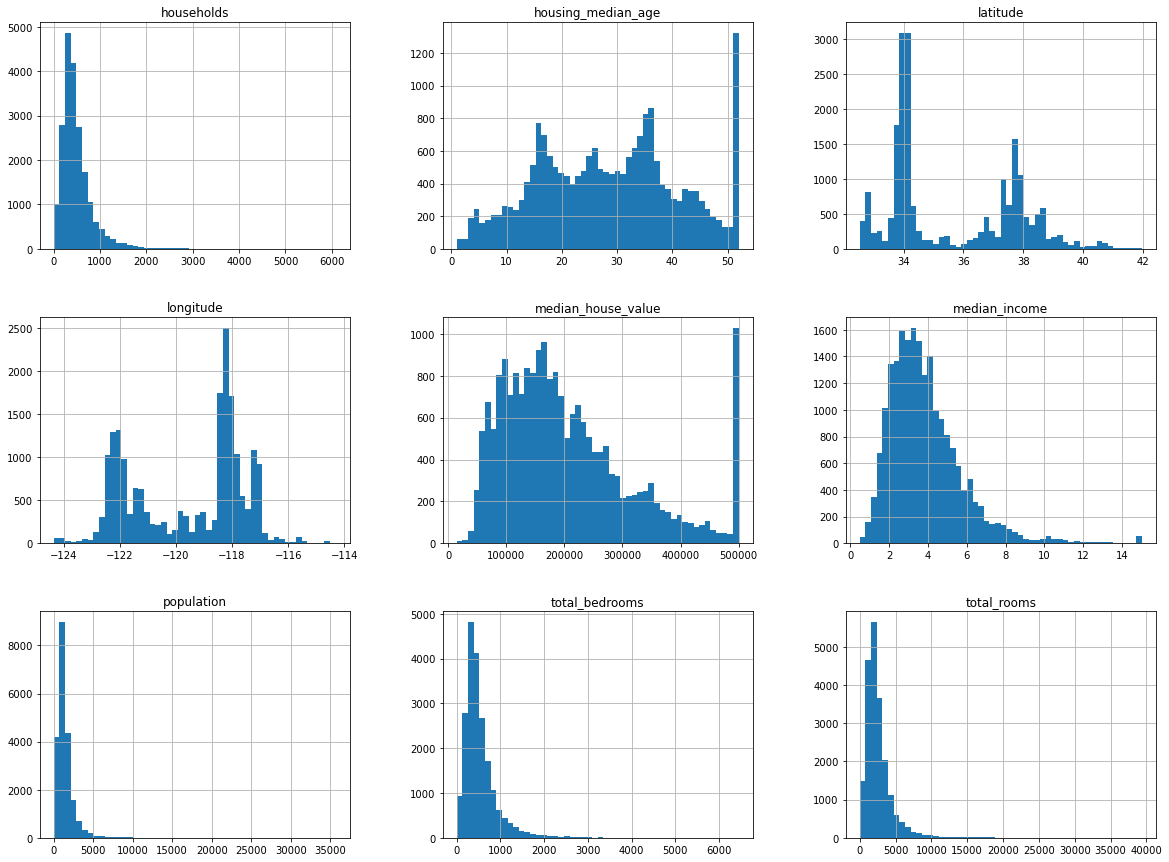

In [72]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

##### What things can you find in the above histograms?
- 'median_income(중위 소득)' variable is not represented in dollar. (See horizontal axis)
- Maximum values of 'housing_median_age(중위 주택 연도)' and 'median_house_value(중위 주택 가격)' variables are strange.
  - It is intentionally set to be limited by data collector.
  - So, you don't have to care, but for other dataset, you should detect and ask this kinds of facts to data engineers.
- Scales (value range) of predictors are different from each other.
  - It is to be handled in data pre-processing stage.

#### Split training and test data
- Remember, you **MUST** split test data first for simulating unseen data
- Use `train_test_split()` method in scikit-learn package
- If you use test set on training your models, it underestimates generalization error, which induces __data snooping bias__.

In [73]:
# import method
from sklearn.model_selection import train_test_split

In [74]:
# set `random_state` for reproduciblity
training_set, test_set = train_test_split(df, test_size=0.2, random_state=202040) 

- Check sample counts of training and test set using `len()` method

In [75]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 16512, Test samples: 4128


### Exploratory Data Analysis (EDA)

In [76]:
# copy data for preventing damage in raw training data
data = training_set.copy()

* Plot scatter-plot of your training data for indicating house location
  - Attach `plot(kind='scatter', x='', y='')` method to your dataframe
  - You can add `alpha` argument for effective representation of scatter density

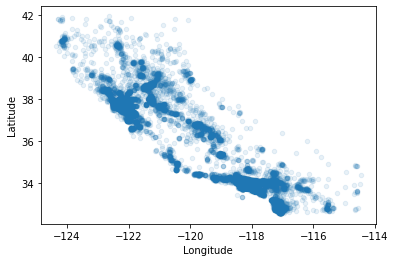

In [77]:
ax = data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
ax.set(xlabel='Longitude', ylabel='Latitude')
plt.show()

* Calculate Pearson's r correlation coefficient among predictors
  - Attach `corr()` method to dataframe

In [78]:
correlation_matrix = data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924726,-0.103263,0.049015,0.072546,0.102086,0.058918,-0.014598,-0.047471
latitude,-0.924726,1.000000,0.005275,-0.043288,-0.072183,-0.112571,-0.076660,-0.080461,-0.142119
housing_median_age,-0.103263,0.005275,1.000000,-0.360107,-0.320407,-0.293105,-0.302444,-0.116998,0.108591
total_rooms,0.049015,-0.043288,-0.360107,1.000000,0.931133,0.855019,0.920570,0.199310,0.133397
total_bedrooms,0.072546,-0.072183,-0.320407,0.931133,1.000000,0.876469,0.980907,-0.007292,0.046944
population,0.102086,-0.112571,-0.293105,0.855019,0.876469,1.000000,0.904495,0.005575,-0.026485
households,0.058918,-0.076660,-0.302444,0.920570,0.980907,0.904495,1.000000,0.013392,0.062730
median_income,-0.014598,-0.080461,-0.116998,0.199310,-0.007292,0.005575,0.013392,1.000000,0.687874
median_house_value,-0.047471,-0.142119,0.108591,0.133397,0.046944,-0.026485,0.062730,0.687874,1.000000


* Inspect which variable is highly correlated with house value
  - Attach `sort_values(ascending=False)` method to correlation matrix you made, after referring the 'median_house_value' column

In [79]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687874
total_rooms           0.133397
housing_median_age    0.108591
households            0.062730
total_bedrooms        0.046944
population           -0.026485
longitude            -0.047471
latitude             -0.142119
Name: median_house_value, dtype: float64

* Seems like 'median_income' is highly correalted with house price
  - let us see scatter plot again

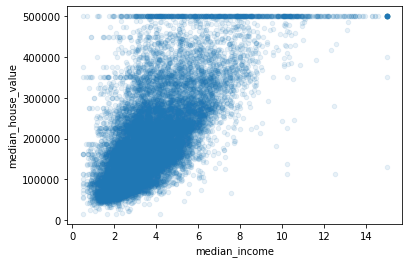

In [80]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

* Yes, it seems better to remove the uppermost lines (due to intentional limit by data engineers).
* You can filter out samples to be remained by providing conditions in `[]` notation.

In [81]:
data = data[data['median_house_value'] < 500000]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15717 entries, 5386 to 2585
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15717 non-null  float64
 1   latitude            15717 non-null  float64
 2   housing_median_age  15717 non-null  float64
 3   total_rooms         15717 non-null  float64
 4   total_bedrooms      15559 non-null  float64
 5   population          15717 non-null  float64
 6   households          15717 non-null  float64
 7   median_income       15717 non-null  float64
 8   median_house_value  15717 non-null  float64
 9   ocean_proximity     15717 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


* You can do more!
  - <u>Create new features</u> by combining existing predictors
  - This kind of work can strengthen our hypothesis (if it is done in a sophisticated manner) 

* For example, it is better to know the number of rooms per household rather than 'total_rooms'.
* Same logic can be applied for 'total_bedrooms' and 'population'
  - Let us make new features: 'rooms_per_household', 'bedrooms_per_room', 'people_per_household'

In [83]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['people_per_household'] = data['population'] / data['households']

<ipython-input-83-541815b7839e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rooms_per_household'] = data['total_rooms'] / data['households']
<ipython-input-83-541815b7839e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
<ipython-input-83-541815b7839e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [84]:
# Check correlation matrix again for additional features
correlation_matrix = data.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.645514
total_rooms             0.142905
rooms_per_household     0.112020
households              0.091778
total_bedrooms          0.071951
housing_median_age      0.070114
population              0.011031
people_per_household   -0.019586
longitude              -0.048110
latitude               -0.146159
bedrooms_per_room      -0.222653
Name: median_house_value, dtype: float64

### Data Pre-processing
* <a href='#Cleanse-data'>Cleanse data</a>
* <a href='#Scale-data'>Scale data</a>

#### Cleanse data
* Handle missing values
  - Just remove rows with missing values
  - Impute missing values using mean, median, or imputation algorithms (NOT covered today)
  - Collect data again
* Drop unncessary columns
* Remove duplicated samples
* Convert categorical data into numerical representation (encoding)

##### Handle missing values
- Remove rows with missing value
- Attach `dropna()` to the dataframe

In [85]:
# We have missing data in 'total_bedrooms' and 'bedrooms_per_room' features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15717 entries, 5386 to 2585
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15717 non-null  float64
 1   latitude              15717 non-null  float64
 2   housing_median_age    15717 non-null  float64
 3   total_rooms           15717 non-null  float64
 4   total_bedrooms        15559 non-null  float64
 5   population            15717 non-null  float64
 6   households            15717 non-null  float64
 7   median_income         15717 non-null  float64
 8   median_house_value    15717 non-null  float64
 9   ocean_proximity       15717 non-null  object 
 10  rooms_per_household   15717 non-null  float64
 11  bedrooms_per_room     15559 non-null  float64
 12  people_per_household  15717 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [86]:
data = data.dropna()

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15559 entries, 5386 to 2585
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15559 non-null  float64
 1   latitude              15559 non-null  float64
 2   housing_median_age    15559 non-null  float64
 3   total_rooms           15559 non-null  float64
 4   total_bedrooms        15559 non-null  float64
 5   population            15559 non-null  float64
 6   households            15559 non-null  float64
 7   median_income         15559 non-null  float64
 8   median_house_value    15559 non-null  float64
 9   ocean_proximity       15559 non-null  object 
 10  rooms_per_household   15559 non-null  float64
 11  bedrooms_per_room     15559 non-null  float64
 12  people_per_household  15559 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


##### Drop unncessary columns
- As we made new features ('rooms_per_household', 'bedrooms_per_room', 'people_per_household'), let us remove features used for making three predictors
- Attach `drop(columns=['COLUMN_NAME'], axis=1)` to the dataframe

In [88]:
data = data.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15559 entries, 5386 to 2585
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15559 non-null  float64
 1   latitude              15559 non-null  float64
 2   housing_median_age    15559 non-null  float64
 3   median_income         15559 non-null  float64
 4   median_house_value    15559 non-null  float64
 5   ocean_proximity       15559 non-null  object 
 6   rooms_per_household   15559 non-null  float64
 7   bedrooms_per_room     15559 non-null  float64
 8   people_per_household  15559 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [90]:
data.shape

(15559, 9)

##### Drop duplicated samples
- Attach `drop_duplicates()` to the dataframe

In [91]:
data = data.drop_duplicates()
data.shape

(15559, 9)

##### Encode cateogrical feature
- Convert categorical feature represented in string format into numerical representation ('ocean_proximity' feature)

In [119]:
data

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,people_per_household
5386,-118.41,34.02,24.0,3.5022,281300.0,<1H OCEAN,3.771676,0.289655,1.910405
16516,-121.21,37.81,18.0,2.9950,124300.0,INLAND,4.750988,0.207155,3.025692
12181,-117.27,33.77,16.0,2.0878,101300.0,<1H OCEAN,5.277064,0.200278,3.411009
908,-122.00,37.54,29.0,5.1616,275100.0,<1H OCEAN,5.518024,0.180015,2.700935
361,-122.12,37.75,33.0,6.8600,250000.0,NEAR BAY,8.260274,0.144279,3.689498
...,...,...,...,...,...,...,...,...,...
6349,-117.94,34.15,33.0,4.4821,220100.0,INLAND,6.224638,0.167637,3.050725
16449,-121.27,38.14,40.0,2.1250,137500.0,INLAND,4.056769,0.276642,2.515284
6016,-117.78,34.06,33.0,2.4464,128700.0,INLAND,3.520000,0.257576,3.213333
16482,-121.16,38.16,31.0,2.4906,122500.0,INLAND,6.180380,0.187404,3.161392


In [92]:
# let us first separate numerical and categorical columns
cat_feat = ['ocean_proximity']
num_feat = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'people_per_household']

- *Beware* that we at first need to split out the dependent variable first!
- Use `drop()` and `loc()` method!

In [93]:
X_train, y_train = data.drop(columns=['median_house_value'], axis=1, inplace=False), data['median_house_value'].values

- Use `OneHotEncoer` provided by Scikit-Learn package
- Select 'ocean_proximity' column only using `[]` or `.COLUMN_NAME` or `loc()` or `iloc()`, and call `fit_transform()` method to `OneHotEncoder`

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
encoder = OneHotEncoder(sparse=False)

encoder.fit(X_train['ocean_proximity'].values.reshape(-1, 1))
X_train_cat = encoder.transform(X_train['ocean_proximity'].values.reshape(-1, 1))

* CAUTION! for test set, you need to fit on training data first, and SHOULD only transform test set!
  - example code snippet)

<pre>
  encoder.fit(training_data)
  training_data = encoder.transform(training_data)
  test_data = encoder.transform(test_data)
</pre>

In [96]:
X_train_cat

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [97]:
X_train_cat.shape

(15559, 5)

### Now, all data are transformed into numerical values!

#### Scale data
* Feature scaling means to transform ranges of all **numerical** features to be similar with each other. <br> (it is enough to just one-hot-encode categorical features)
* Standard scaling (standardization) is to make feature to have mean 0 and standard deviation 1.
  - It is **TOTALLY different** from converting data distribution to Gaussian ditsribution!!!
  - Except for models having assumption of Gaussian distributed data, such as Linear Discriminant analysis, Gaussian Mixture models, <br>
  it is NOT needed to convert data distribution to be Gaussian.
  - It is just shift the range of feature distribution
* Feature scaling is especially important for algorithms:
  - based on Euclidean distance like K-means clustering, k-NN (different scale distorts distance measure)
  - based on gradient-based optimizations like logistic regression, neural networks (different scales distorts loss surface)
  - regard scale of features with significance like PCA

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method

In [98]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

In [99]:
X_train_num.shape

(15559, 7)

##### Finish up data pre-processing
- Now, we need to concatenate categorical (one-hot encoded) and numerical (standardized) features!
- It can be easily done by `np.concatenate([*arrays], axis=1)` method

In [100]:
X_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train.shape

(15559, 12)

### Don't forget! You should do the same process above on the test set you made in <a href='#Split-training-and-test-data'>here</a>

### Model training and evaluation
* <a href='#Train-model'>Train model</a>
* <a href='#Evaluate-model'>Evaluate model</a>

#### Train model
* Choose an appropriate algorithm for your problem setting
* There are tons of ready-made algorithms in here: <a href='https://scikit-learn.org/stable/supervised_learning.html'>Scikit-Learn</a>

* To train model, we need to create model instance such as `LinearRegression()` and call `fit()` method by providing independent and dependent variables.

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

* Performance of the trained model on the training set can easily be found by calling `score()` method (which returns r-squared) or calling another metrics like `mean_squared_error` with result from `predict()` method.

In [102]:
lin_reg.score(X_train, y_train)

0.593101467384535

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = lin_reg.predict(X_train)

lin_reg_mse = mean_squared_error(y_train, y_pred_train)
lin_reg_mae = mean_absolute_error(y_train, y_pred_train)

print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')

MAE: 45706.9342, MSE: 3830588071.8046, RMSE: 61891.7448


#### Evaluate model
* Internal evaluation
  - Evaluate the performance of the trained model using training data by simulating training-test split internally.
  - Bootstrapping (NOT covered), cross-validation
* External evaluation
  - Evaluate the performance of the trained model using unseen data (test set).

##### Internal evaluation
- Can be easily done by `cross_val_score()` method
- When passing argument `cv=10`, it executes 10-fold CV

In [104]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_cv_scores = np.sqrt(-scores)

In [105]:
print(f'Scores: {lin_reg_rmse_cv_scores},\nMean: {np.mean(lin_reg_rmse_cv_scores):.4f},\nStd: {np.std(lin_reg_rmse_cv_scores):.4f}')

Scores: [61203.73039232 61187.18482927 61294.30144604 62723.034282
 63452.28744925 60635.77317544 61700.98658045 63205.45165825
 60066.9957778  64498.76622154],
Mean: 61996.8512,
Std: 1334.4856


##### External evaluation
- After processing <a href='#Split-training-and-test-data'>test set</a> you split above in the same way as training set, measure the performance of the trained model on this test set
- Use `predict()` method

In [106]:
test = test_set.copy()

In [107]:
test = test[test['median_house_value'] < 500000]

In [108]:
test['rooms_per_household'] = test['total_rooms'] / test['households']
test['bedrooms_per_room'] = test['total_bedrooms'] / test['total_rooms']
test['people_per_household'] = test['population'] / test['households']

In [109]:
test = test.dropna()

In [110]:
test = test.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

In [111]:
test = test.drop_duplicates()

In [112]:
X_test, y_test = test.drop(columns=['median_house_value'], axis=1, inplace=False), test['median_house_value'].values

In [113]:
cat_feat = ['ocean_proximity']
num_feat = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'people_per_household']

In [114]:
# encoder is the one you've done fitting in the above using training set!!!
X_test_cat = encoder.transform(X_test['ocean_proximity'].values.reshape(-1, 1))

In [115]:
# scalar is the one you've done fitting in the above using training set!!!
X_test_num = scalar.transform(X_test[num_feat].values)

In [116]:
X_test = np.concatenate([X_test_num, X_test_cat], axis=1)

In [117]:
y_pred_test = lin_reg.predict(X_test)

lin_reg_mse = mean_squared_error(y_test, y_pred_test)
lin_reg_mae = mean_absolute_error(y_test, y_pred_test)

print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')

MAE: 44797.8116, MSE: 3702269197.0979, RMSE: 60846.2751
